In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')

In [5]:
df

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1
...,...,...,...,...,...
995,171.0,2.0,0,0,0
996,101.0,2.0,1,1,0
997,260.0,3.0,0,0,0
998,208.0,3.0,0,1,0


In [37]:
df[df.buy == 0].time_on_page

50     149.0
51     -34.0
52     222.0
53     223.0
54     106.0
       ...  
995    171.0
996    101.0
997    260.0
998    208.0
999    134.0
Name: time_on_page, Length: 950, dtype: float64

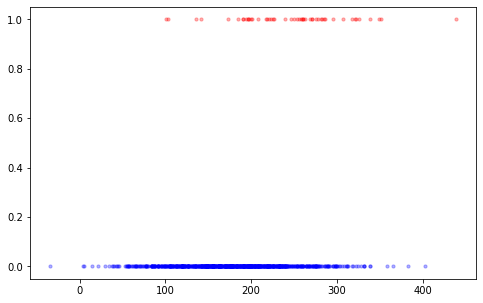

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df[df.buy == 0].time_on_page, df[df.buy == 0].buy, zorder=1, s=10, alpha=0.3, c='b')
ax.scatter(df[df.buy == 1].time_on_page, df[df.buy == 1].buy, zorder=2, s=10, alpha=0.3, c='r')
plt.show()

<AxesSubplot:>

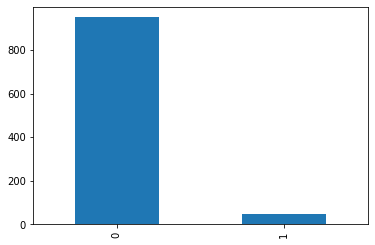

In [6]:
df.buy.value_counts().plot(kind='bar')

<AxesSubplot:>

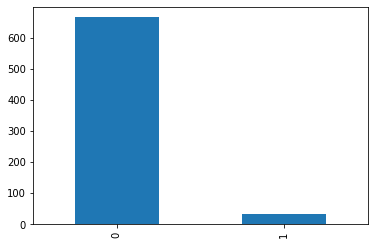

In [7]:
train, test = train_test_split(df, test_size=0.3, stratify=df.buy)
train.buy.value_counts().plot(kind='bar')

In [8]:
x_train, x_test = train.iloc[:,:-1], test.iloc[:,:-1]
y_train, y_test = train.iloc[:,-1], test.iloc[:,-1]

In [9]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
pred = log_reg.predict(x_test)

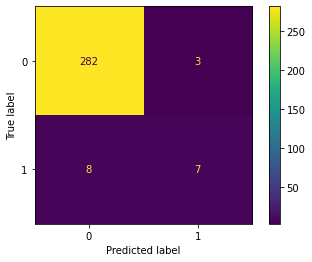

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.70      0.47      0.56        15

    accuracy                           0.96       300
   macro avg       0.84      0.73      0.77       300
weighted avg       0.96      0.96      0.96       300



In [12]:
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(x_train, y_train)

<AxesSubplot:>

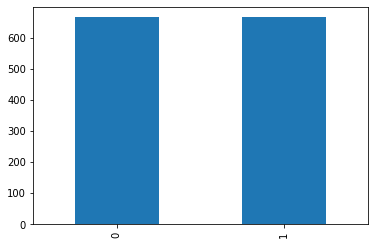

In [15]:
pd.DataFrame(y_res).buy.value_counts().plot(kind='bar')

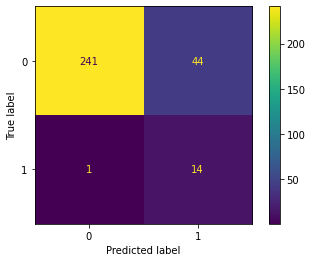

In [16]:
log_reg2 = LogisticRegression()
log_reg2.fit(x_res, y_res)
pred_res = log_reg2.predict(x_test)
cm = confusion_matrix(y_test, pred_res)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [27]:
print(classification_report(y_test, pred_res))

              precision    recall  f1-score   support

           0       1.00      0.85      0.91       285
           1       0.24      0.93      0.38        15

    accuracy                           0.85       300
   macro avg       0.62      0.89      0.65       300
weighted avg       0.96      0.85      0.89       300

